bhp.csv \
contains property prices in banglore, India. You need to examine price_per_sqft column and do following:
1. Remove outlier using percentile technique first. Use [0.001,0.999] for lower and upper bound percentiles
2. After removing outliers in step 1, you get a new dataframe.
3. On step(2) dataframe, use 4 standard deviation to remove outliers
4. Plot histogram for new dataframe that is generated after step(3). Also plot bell curve on same histogram
5. On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

### Remove outlier using percentile 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('bhp.csv')
df.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.shape

(13200, 7)

In [5]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Text(0, 0.5, 'count')

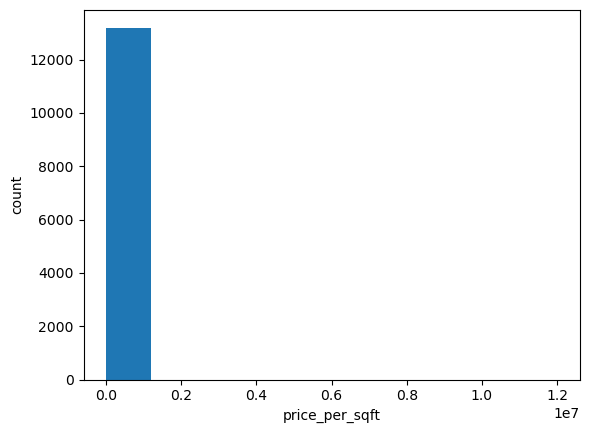

In [6]:
plt.hist(df.price_per_sqft)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

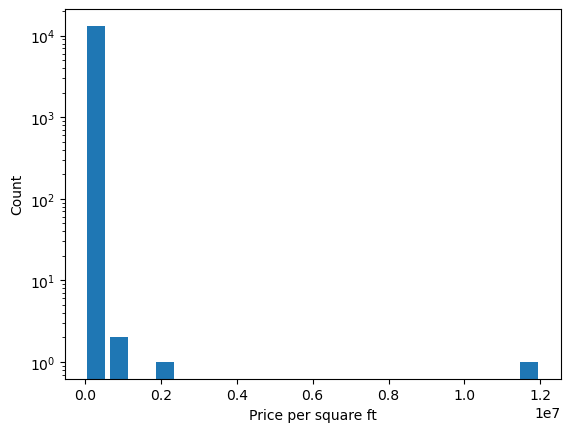

In [7]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [8]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001,0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [14]:
df_new = df[(df['price_per_sqft']> upper_limit) | (df['price_per_sqft']<lower_limit)]
df_new.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
7575,other,1 BHK,425.0,1.0,750.0,1,176470
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
12355,other,4 BHK,16335.0,4.0,149.0,4,912


In [16]:
df_1 = df[(df['price_per_sqft'] < upper_limit) & (df['price_per_sqft'] > lower_limit)]
df_1.shape

(13172, 7)

In [19]:
df.shape

(13200, 7)

In [20]:
df.shape[0]-df_1.shape[0]

28

### Remove outlier using Standard deviation

In [21]:
upper_limit = df_1.price_per_sqft.mean() + 4 * df_1.price_per_sqft.std()
lower_limit = df_1.price_per_sqft.mean() - 4 * df_1.price_per_sqft.std()
lower_limit, upper_limit

(-9900.429065502549, 23227.73653589429)

In [22]:
df_1[(df_1.price_per_sqft > upper_limit) | (df_1.price_per_sqft < lower_limit)].sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8861,Cunningham Road,5 Bedroom,2925.0,5.0,936.0,5,32000
7561,KR Puram,8 Bedroom,1500.0,7.0,382.0,8,25466
6864,5th Block Hbr Layout,9 Bedroom,2600.0,12.0,675.0,9,25961
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
6285,Malleshwaram,4 Bedroom,3000.0,5.0,815.0,4,27166


In [24]:
df2 = df_1[(df_1.price_per_sqft < upper_limit) & (df_1.price_per_sqft > lower_limit)]
df2.shape

(13047, 7)

In [25]:
df_1.shape[0] - df2.shape[0]

125

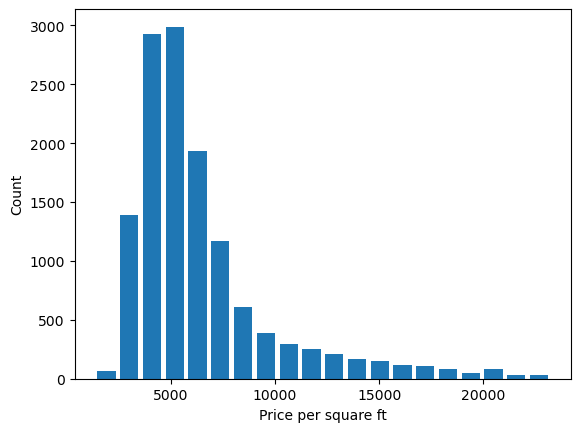

In [26]:
plt.hist(df2.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

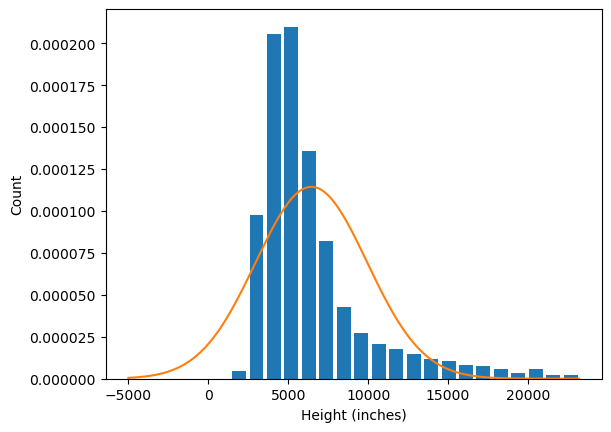

In [27]:
from scipy.stats import norm
import numpy as np

plt.hist(df2.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df2.price_per_sqft.max(),100)
plt.plot(rng, norm.pdf(rng,df2.price_per_sqft.mean(),df2.price_per_sqft.std()))

### Removing outliers using Z score of 4 

In [43]:
df_1['zscore'] = (df_1.price_per_sqft - df_1.price_per_sqft.mean())/df_1.price_per_sqft.std()
df_1.sample(5)

C:\Users\sunam\AppData\Local\Temp\ipykernel_9640\3690148989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['zscore'] = (df_1.price_per_sqft - df_1.price_per_sqft.mean())/df_1.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
11779,Hennur Road,3 BHK,1672.0,3.0,86.00,3,5143,-0.367217
563,other,2 BHK,1160.0,2.0,55.00,2,4741,-0.464295
8683,Kenchenahalli,2 BHK,870.0,1.0,45.00,2,5172,-0.360214
4876,Raja Rajeshwari Nagar,2 BHK,1140.0,2.0,38.65,2,3390,-0.790543
3639,Chandapura,2 BHK,1015.0,2.0,25.88,2,2549,-0.993633


In [45]:
out_df = df_1[(df_1.zscore < -4) | (df_1.zscore > 4)]
out_df.shape

(125, 8)

In [46]:
df4 = df_1[(df_1.zscore > -4) & (df_1.zscore < 4)]
df4.shape

(13047, 8)

In [48]:
df_1.shape[0] - df4.shape[0]

125